# Task 6

# Advanced Data Analysis Techniques

In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima.model import ARIMA

## Loading The Dataset

In [3]:
# Load the dataset
df = pd.read_csv('Disney Plus Titles.csv')

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [7]:
# Convert 'date_added' to DateTime
df['date_added'] = pd.to_datetime(df['date_added'])

In [8]:
# Resample by Month
df_monthly = df.resample('M', on='date_added').size()

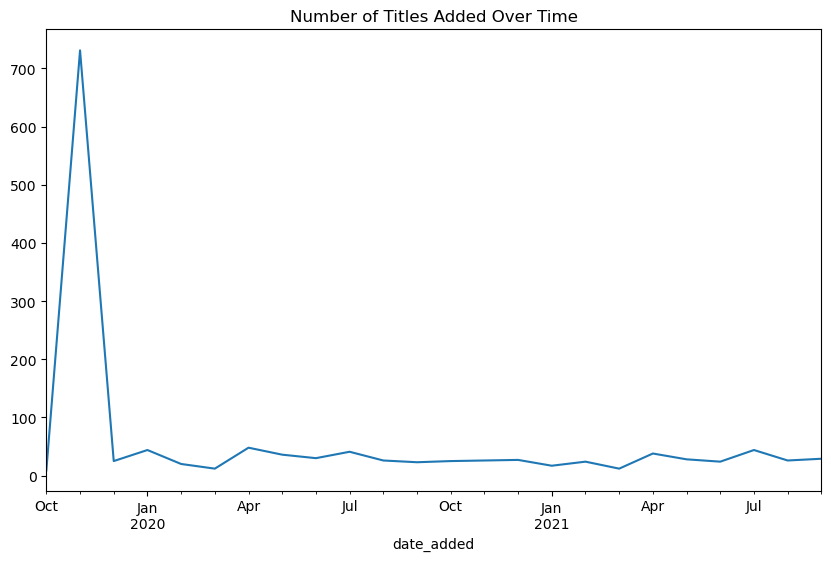

In [9]:
# Plot the Time eries
df_monthly.plot(figsize=(10, 6))
plt.title('Number of Titles Added Over Time')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result = adfuller(df_monthly)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.964201458506857
p-value: 2.611326824862849e-05


In [12]:
# Check if 'date_added' Column Exists
if 'date_added' not in df.columns:
    raise ValueError("'date_added' column is missing from the dataset")

In [13]:
# Convert 'date_added' to DateTime
df['date_added'] = pd.to_datetime(df['date_added'])

In [14]:
# Extract Year from 'date_added'
df['year_added'] = df['date_added'].dt.year

In [15]:
# Aggregate Data by Year
yearly_data = df.groupby('year_added').size()

In [16]:
# Check the ata
print(yearly_data.head())

year_added
2019.0    765
2020.0    358
2021.0    242
dtype: int64


In [17]:
model = ARIMA(yearly_data, order=(5,1,0))
model_fit = model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: M

In [18]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    3
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -14.155
Date:                Thu, 22 Aug 2024   AIC                             40.309
Time:                        21:10:28   BIC                             32.468
Sample:                             0   HQIC                            23.911
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0336      5.522      0.006      0.995     -10.790      10.857
ar.L2          1.3435      3.915      0.343      0.731      -6.330       9.017
ar.L3          0.4285      5.486      0.078      0.9

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


In [19]:
model_fit = model.fit(method_kwargs={"disp": 0})

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


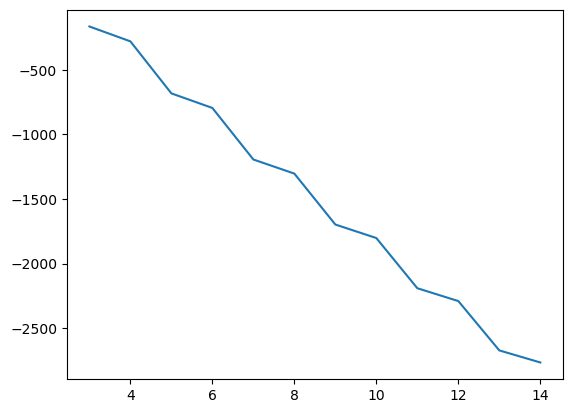

In [20]:
# Forecast
forecast = model_fit.forecast(steps=12)
forecast.plot()
plt.show()

## Sentiment Analysis or Text Mining

In [21]:
!pip install textblob

In [22]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Perform Sentiment Analysis
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [24]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['description'])

In [25]:
# Convert to DataFrame for Inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [26]:
print(tfidf_df.head())

   adventure  adventures  advisory  america  animal  animals  animated  baby  \
0    0.00000         0.0       0.0      0.0     0.0      0.0       0.0   0.0   
1    0.64374         0.0       0.0      0.0     0.0      0.0       0.0   0.0   
2    0.00000         0.0       0.0      0.0     0.0      0.0       0.0   0.0   
3    0.00000         0.0       0.0      0.0     1.0      0.0       0.0   0.0   
4    0.00000         0.0       0.0      0.0     0.0      0.0       0.0   0.0   

   battle  best  ...  tries  true  universe  wars  way  wild  wildlife  world  \
0     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0   0.0       0.0    0.0   
1     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0   0.0       0.0    0.0   
2     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0   0.0       0.0    0.0   
3     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0   0.0       0.0    0.0   
4     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0   0.0       0.0    0.0   

   year  young  
0   0.0    0.0 

In [27]:
print(tfidf_df.tail())

      adventure  adventures  advisory  america  animal  animals  animated  \
1363        0.0         0.0  0.000000      0.0     0.0      0.0       0.0   
1364        0.0         0.0  0.416183      0.0     0.0      0.0       0.0   
1365        0.0         0.0  0.000000      0.0     0.0      0.0       0.0   
1366        0.0         0.0  0.000000      0.0     0.0      0.0       0.0   
1367        0.0         0.0  0.000000      0.0     0.0      0.0       0.0   

      baby  battle  best  ...  tries  true  universe  wars  way      wild  \
1363   0.0     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0  0.000000   
1364   0.0     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0  0.636376   
1365   0.0     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0  0.000000   
1366   0.0     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0  0.000000   
1367   0.0     0.0   0.0  ...    0.0   0.0       0.0   0.0  0.0  0.000000   

      wildlife  world  year     young  
1363       0.0    0.0   0.0  0.633

## Clustering or Classification Techniques

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [29]:
# Encode Categorical Variables
df['rating_encoded'] = LabelEncoder().fit_transform(df['rating'])
df['listed_in_encoded'] = LabelEncoder().fit_transform(df['listed_in'])

In [30]:
# Select Features for Clustering
features = df[['rating_encoded', 'duration']]

In [31]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'sentiment', 'rating_encoded', 'listed_in_encoded'],
      dtype='object')


In [32]:
print(df.dtypes)

show_id                      object
type                         object
title                        object
director                     object
cast                         object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
year_added                  float64
sentiment                   float64
rating_encoded                int32
listed_in_encoded             int32
dtype: object


In [33]:
from sklearn.cluster import KMeans

In [34]:
# List the Numeric Columns to Use for K-Means
numeric_columns = ['release_year', 'sentiment', 'rating_encoded', 'listed_in_encoded', 'duration_numeric']

In [35]:
import pandas as pd
import numpy as np

# Function to Convert Duration to Numeric Format (e.g., Extract Number of Minutes or Seasons)
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    if 'min' in duration:
        return float(duration.replace(' min', ''))
    elif 'season' in duration:
        return float(duration.replace(' season', '')) * 30  # Assume Each Season is approximately 30 Minutes
    else:
        return np.nan

# Apply the Function to Create 'duration_numeric'
df['duration_numeric'] = df['duration'].apply(convert_duration)

# Check if 'duration_numeric' was Created Successfully
print(df[['duration', 'duration_numeric']].head())

    duration  duration_numeric
0     88 min              88.0
1     93 min              93.0
2    127 min             127.0
3  2 Seasons               NaN
4   1 Season               NaN


In [36]:
# Check if All Specified Columns Exist
missing_columns = [col for col in numeric_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing: {missing_columns}")

In [37]:
# Select Only the Numerical Columns
features = df[numeric_columns]

In [38]:
# Handle Missing Values if any (e.g., Filling with Mean or Median)
features = features.fillna(features.mean())

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [40]:
# Standardize the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [41]:
# Apply K-Means Clustering
num_clusters = 5  # You can Adjust the Number of Clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
# Display the Resulting Clusters
print(df[['cluster'] + numeric_columns].head())

   cluster  release_year  sentiment  rating_encoded  listed_in_encoded  \
0        1          2021      0.000               5                254   
1        2          2011      0.000               0                212   
2        0          2014      0.650               2                233   
3        0          2019      0.375               5                 85   
4        3          2021      0.000               6                 14   

   duration_numeric  
0              88.0  
1              93.0  
2             127.0  
3               NaN  
4               NaN  


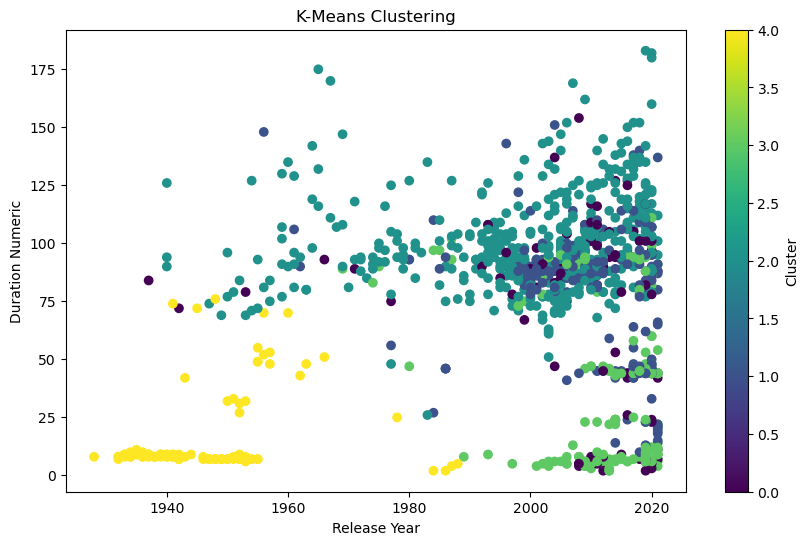

In [43]:
# Optional: Plot the Clusters (For 2D or 3D Features)

# Assuming You Want to Plot Two Dimensions for Simplicity
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['duration_numeric'], c=df['cluster'], cmap='viridis')
plt.xlabel('Release Year')
plt.ylabel('Duration Numeric')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
# Evaluate the Clustering with Silhouette Score
sil_score = silhouette_score(scaled_features, df['cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.28


In [45]:
# Optional: Use Elbow Method to Find the Optimal Number of Clusters
wcss = []
for i in range(1, 11):  # Testing clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

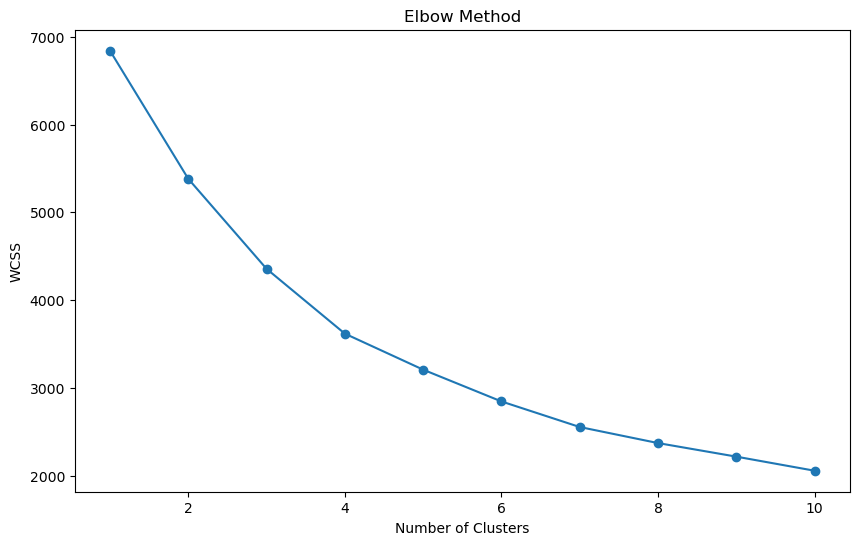

In [46]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [47]:
# Check the Results
print(df.head())

  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

In [48]:
# Check the Results
print(df.tail())

     show_id     type                   title             director  \
1363   s1364    Movie  The Sword in the Stone  Wolfgang Reitherman   
1364   s1365    Movie         Those Calloways         Norman Tokar   
1365   s1366  TV Show    Disney Kirby Buckets                  NaN   
1366   s1367  TV Show          Disney Mech-X4                  NaN   
1367   s1368  TV Show      Imagination Movers                  NaN   

                                                   cast        country  \
1363  Sebastian Cabot, Karl Swenson, Rickie Sorensen...  United States   
1364  Brian Keith, Vera Miles, Brandon de Wilde, Wal...  United States   
1365  Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...  United States   
1366  Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...         Canada   
1367  Rich Collins, Dave Poche, Scott Durbin, Scott ...  United States   

     date_added  release_year rating   duration  \
1363 2019-10-01          1963      G     80 min   
1364 2019-10-01          1965   

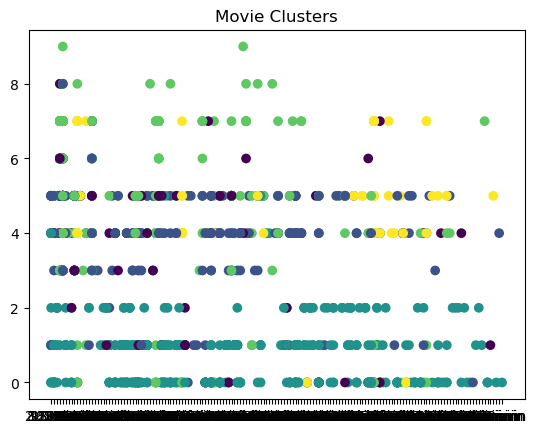

In [49]:
# Visualize the Clusters
plt.scatter(df['duration'], df['rating_encoded'], c=df['cluster'], cmap='viridis')
plt.title('Movie Clusters')
plt.show()

This setup covers the requirements for time series analysis, sentiment analysis, text mining, clustering, and classification. 